<a href="https://colab.research.google.com/github/AMAYadav/PROJECTS-/blob/main/factor_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.3 MB 29.6 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


Factor Modelling - To explain the Excess Returns of a portfolio or Assets using factors
 

In [15]:
asset='BAJAJ-AUTO.NS';start='2018-04-01';end= '2021-10-31'

[*********************100%***********************]  1 of 1 completed


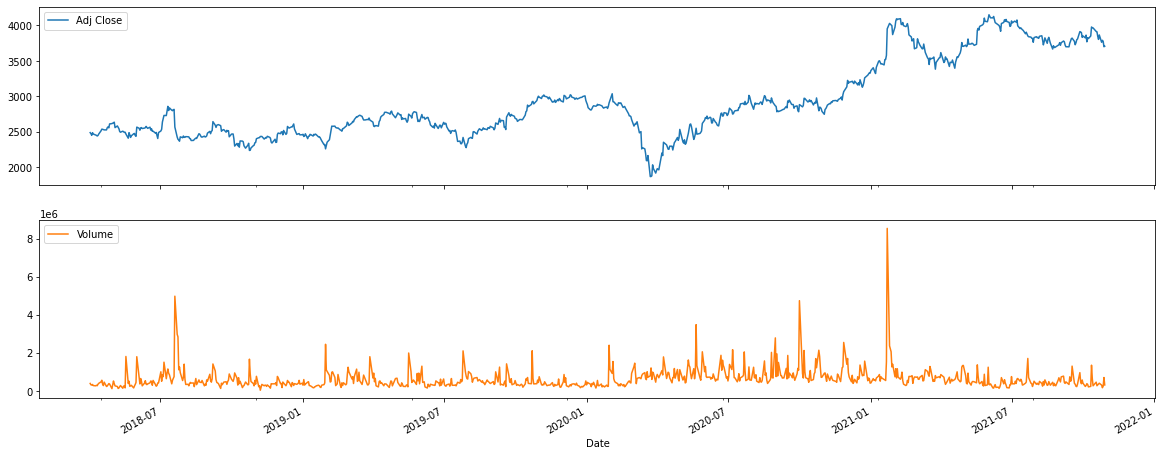

In [16]:
stock= yf.download(tickers='BAJAJ-AUTO.NS',start=start,end=end,rounding=True,auto_adjust=False)[['Adj Close','Volume']]
stock.plot(subplots=True,figsize=(20,8),kind='line')
plt.legend(loc='upper left')

In [24]:
del stock['Volume']
stock.head()

,Adj Close
Date,
2018-04-02,2490.29
2018-04-03,2475.27
2018-04-04,2452.22
2018-04-05,2489.58
2018-04-06,2470.30


In [25]:
y = stock['Adj Close'].resample('M') \
 .last() \
 .pct_change() \
 .dropna()



In [26]:
y.index= y.index.strftime('%Y-%m')

In [27]:
y.name='returns'
y.head()

Date
2018-05   -0.068516
2018-06    0.021814
2018-07   -0.019482
2018-08    0.016591
2018-09   -0.020910
Name: returns, dtype: float64

In [46]:
url=['https://faculty.iima.ac.in/~iffm/Indian-Fama-French-Momentum/']

file=pd.read_csv('/content/20191231_FourFactors_and_Market_Returns_Monthly.csv')
file.tail()

,Month,SMB %,HML %,WML %,Rm %,Rf %,Rm-Rf %
310,201908,0.534308,-4.763220,8.678124,-0.285534,0.429547,-0.712210
311,201909,3.571848,-7.878491,4.201514,4.291048,0.396424,3.880013
312,201910,-4.433875,-3.866972,-5.963407,4.692373,0.404875,4.271045
313,201911,-2.334562,0.012786,-7.226742,0.255699,0.393417,-0.137210
314,201912,-1.031962,-4.163211,5.059692,0.225183,0.409071,-0.183171


In [47]:
file.head()

,Month,SMB %,HML %,WML %,Rm %,Rf %,Rm-Rf %
0,199310,1.743275,2.336015,5.472541,-1.431621,0.539989,-1.961665
1,199311,-9.550885,-0.495425,13.678909,17.356034,0.542141,16.728924
2,199312,-3.223633,8.570654,0.178863,10.726437,0.325955,10.370179
3,199401,5.183124,-6.113533,-3.875920,20.376547,0.599581,19.665489
4,199402,0.825280,-3.145383,10.144933,4.356845,0.650502,3.683473


In [48]:
type(file.Month)

file.Month = pd.to_datetime(file.Month,format='%Y%m')
# file.set_index('Date',inplace=True)

In [49]:
file.tail()

,Month,SMB %,HML %,WML %,Rm %,Rf %,Rm-Rf %
310,2019-08-01,0.534308,-4.763220,8.678124,-0.285534,0.429547,-0.712210
311,2019-09-01,3.571848,-7.878491,4.201514,4.291048,0.396424,3.880013
312,2019-10-01,-4.433875,-3.866972,-5.963407,4.692373,0.404875,4.271045
313,2019-11-01,-2.334562,0.012786,-7.226742,0.255699,0.393417,-0.137210
314,2019-12-01,-1.031962,-4.163211,5.059692,0.225183,0.409071,-0.183171


In [42]:
file_1=file.Month.loc['start':'end']
len(file_1)

0

In [51]:
file[['Month']].head()

,Month
0,1993-10-01
1,1993-11-01
2,1993-12-01
3,1994-01-01
4,1994-02-01


In [56]:
file.columns

Index(['Month', 'SMB %', 'HML %', 'WML %', 'Rm %', 'Rf %', 'Rm-Rf %'], dtype='object')

In [57]:
file.set_index('Month',inplace=True)

In [58]:
file.columns


Index(['SMB %', 'HML %', 'WML %', 'Rm %', 'Rf %', 'Rm-Rf %'], dtype='object')